# Semi-supervised binary classification with graphs

In [1]:
using Plots
using GraphRecipes
using LinearAlgebra

### Incidence Matrix

In [2]:
Mw = [
    -sqrt(20) 0         0         sqrt(20)  0
    0         0         -sqrt(8)  sqrt(8)   0
    -sqrt(5)  0         sqrt(5)   0         0
    0         -sqrt(3)  sqrt(3)   0         0
    0         0         -sqrt(5)  0         sqrt(5)
    0         0         0         -sqrt(10) sqrt(10)
]

sum(Mw, dims=2)

6×1 Array{Float64,2}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

### Graph-Laplacian Matrix

In [3]:
Lw = transpose(Mw) * Mw 

5×5 Array{Float64,2}:
  25.0   0.0  -5.0  -20.0    0.0
   0.0   3.0  -3.0    0.0    0.0
  -5.0  -3.0  21.0   -8.0   -5.0
 -20.0   0.0  -8.0   38.0  -10.0
   0.0   0.0  -5.0  -10.0   15.0

In [4]:
sum(Lw, dims=2)

5×1 Array{Float64,2}:
  0.0
  0.0
 -2.6645352591003757e-15
 -1.7763568394002505e-15
 -1.7763568394002505e-15

In [5]:
sum(Lw, dims=1)

1×5 Array{Float64,2}:
 0.0  0.0  -2.66454e-15  -1.77636e-15  -1.77636e-15

The first eigenvalue of the Laplacian matrix is zero

In [7]:
eigvals(Lw)

5-element Array{Float64,1}:
  5.533334058818254e-15
  3.378148113963945
 17.752372985462227
 26.407889128850282
 54.461589771723595

> "any eigenvector corresponding to a non-zero eigenvalue must be orthogonal to the first eigenvector, which means that the sum of its entries must be zero."

In [6]:
eigvecs(Lw)

5×5 Array{Float64,2}:
 -0.447214   0.258766  -0.561176   -0.357643  -0.538714
 -0.447214  -0.88715    0.0144413  -0.112836   0.00498722
 -0.447214   0.111825  -0.0710145   0.880417  -0.0855502
 -0.447214   0.251794  -0.185606   -0.194928   0.814956
 -0.447214   0.264765   0.803356   -0.215009  -0.195679

## An example

In [8]:
Mw = [
    00 00 00 00 00 00
    -5  0  0  0  5  0
     0  0  0 -5  5  0
     0 -9  0  0  0  9
    -8  0  0  8  0  0
     0  0 -6  0  0  6
     0 -6  6  0  0  0
     0  0 -7  0  7  0
]

8×6 Array{Int64,2}:
  0   0   0   0  0  0
 -5   0   0   0  5  0
  0   0   0  -5  5  0
  0  -9   0   0  0  9
 -8   0   0   8  0  0
  0   0  -6   0  0  6
  0  -6   6   0  0  0
  0   0  -7   0  7  0

In [9]:
Lw = transpose(Mw) * Mw

6×6 Array{Int64,2}:
  89    0    0  -64  -25    0
   0  117  -36    0    0  -81
   0  -36  121    0  -49  -36
 -64    0    0   89  -25    0
 -25    0  -49  -25   99    0
   0  -81  -36    0    0  117

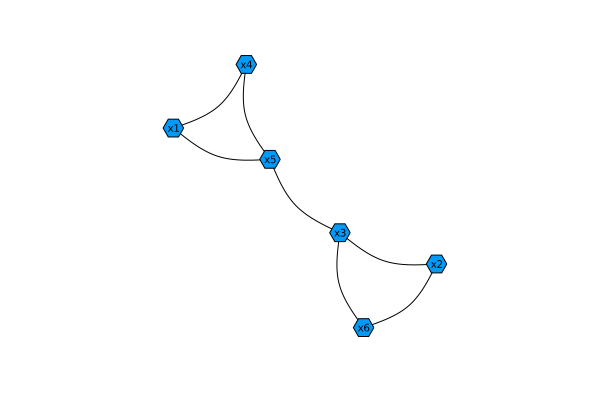

In [10]:
D = copy(Lw)
D[diagind(D)] .= 0
graphplot(D, names=["x1" "x2" "x3" "x4" "x5" "x6"])

Suppose we want to classify each node according to class (1) or (0). We already know that `x4=1` and `x6=0`. Next, we create the projection matrices $\text{P}_R$ and $\text{P}_{R\perp}$

## References
* https://csustan.csustan.edu/~tom/Clustering/GraphLaplacian-tutorial.pdf
* https://qmplus.qmul.ac.uk/pluginfile.php/2461458/mod_resource/content/18/mth793p-lecture-notes.pdf
* http://www.maths.nuigalway.ie/~rquinlan/linearalgebra/section3-1.pdf